In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:,:2]
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, stratify=y)

In [2]:
import pandas as pd
pd.DataFrame(X,columns=iris.feature_names[:2])

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [3]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()     #Instantiate tree with default parameters
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [4]:
from sklearn.metrics import accuracy_score
y_pred = dtc.predict(X_test)
accuracy_score(y_test, y_pred)

0.6666666666666666

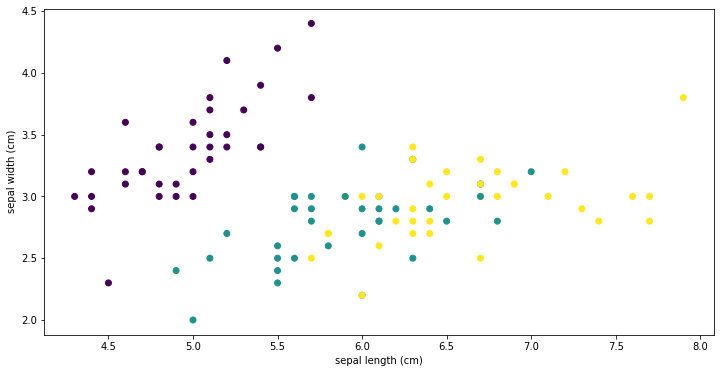

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=((12,6)))
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

In [6]:
# now optimize the decision tree's performance
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [7]:
from sklearn.model_selection import GridSearchCV, cross_val_score
param_grid = {'criterion':['gini','entropy'], 'max_depth' :[3,5,7,20]}
gs_inst = GridSearchCV(dtc,param_grid=param_grid,cv=5)
gs_inst.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 20]})

In [8]:
from sklearn.metrics import accuracy_score
y_pred_gs = gs_inst.predict(X_test)
accuracy_score(y_test, y_pred_gs)

0.7111111111111111

In [11]:
#gs_inst.grid_scores_
gs_inst.cv_results_

{'mean_fit_time': array([0.00100207, 0.00384645, 0.00421858, 0.00169468, 0.00158238,
        0.00102968, 0.00085926, 0.00083017]),
 'std_fit_time': array([0.00075531, 0.00539028, 0.00264957, 0.00046998, 0.00127133,
        0.00051933, 0.00061238, 0.00055672]),
 'mean_score_time': array([0.00035887, 0.00294218, 0.00237403, 0.00183129, 0.0005765 ,
        0.00074434, 0.00038319, 0.00030522]),
 'std_score_time': array([6.65069727e-05, 4.57707764e-03, 1.37411688e-03, 1.25143075e-03,
        2.08209131e-04, 8.32359000e-04, 1.70166434e-04, 4.46952876e-05]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'entropy', 'entropy',
                    'entropy', 'entropy'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[3, 5, 7, 20, 3, 5, 7, 20],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
          

In [16]:
gs_inst.cv_results_['mean_test_score'],gs_inst.cv_results_['params']

(array([0.73333333, 0.74285714, 0.6952381 , 0.71428571, 0.76190476,
        0.76190476, 0.6952381 , 0.72380952]),
 [{'criterion': 'gini', 'max_depth': 3},
  {'criterion': 'gini', 'max_depth': 5},
  {'criterion': 'gini', 'max_depth': 7},
  {'criterion': 'gini', 'max_depth': 20},
  {'criterion': 'entropy', 'max_depth': 3},
  {'criterion': 'entropy', 'max_depth': 5},
  {'criterion': 'entropy', 'max_depth': 7},
  {'criterion': 'entropy', 'max_depth': 20}])

In [17]:
gs_inst.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3)

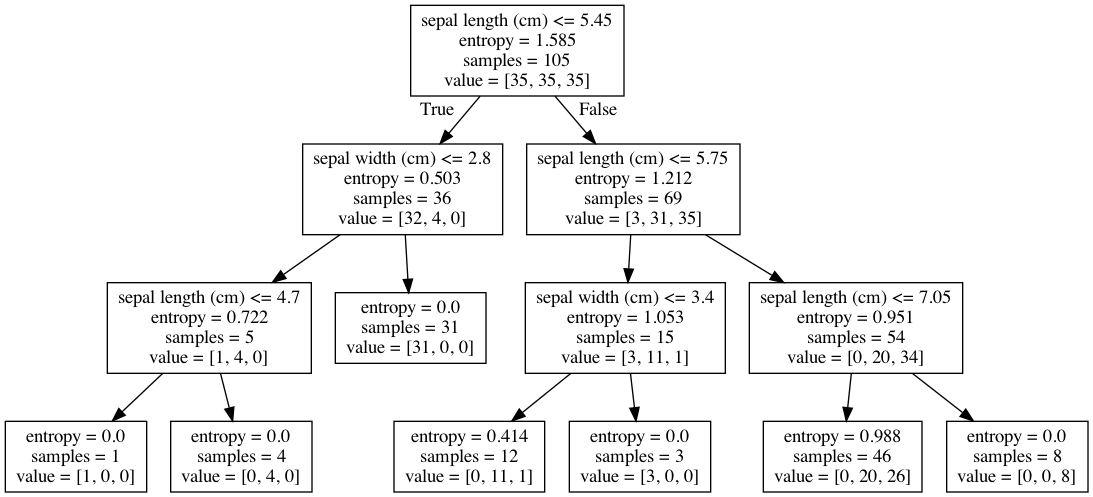

In [21]:
import numpy as np
from sklearn import tree
from six import StringIO
import pydot
from IPython.display import Image
dot_iris = StringIO()
tree.export_graphviz(gs_inst.best_estimator_, out_file = dot_iris,
feature_names = iris.feature_names[:2])
graph, = pydot.graph_from_dot_data(dot_iris.getvalue())
Image(graph.create_png())

In [23]:
grid_interval = 0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])
xmin_plot, xmax_plot = xmin - .5, xmax + .5
ymin_plot, ymax_plot = ymin - .5, ymax + .5
xx, yy = np.meshgrid(np.arange(xmin_plot, xmax_plot,grid_interval),
np.arange(ymin_plot, ymax_plot, grid_interval))

In [26]:
test_preds =gs_inst.best_estimator_.predict(np.array(list(zip(xx.ravel(),yy.ravel()))))

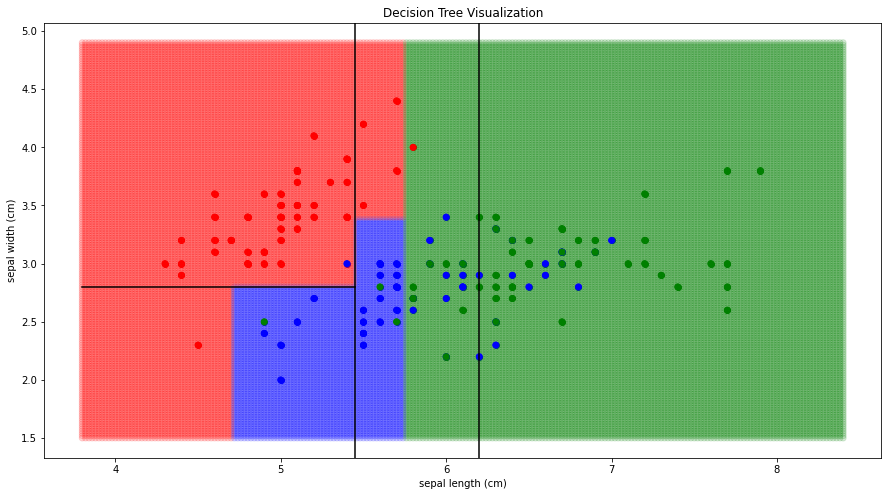

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

X_0 = X[y == 0]
X_1 = X[y == 1]
X_2 = X[y == 2]

plt.figure(figsize=(15,8)) #change figure-size for easier viewing
plt.scatter(X_0[:,0],X_0[:,1], color = 'red')
plt.scatter(X_1[:,0],X_1[:,1], color = 'blue')
plt.scatter(X_2[:,0],X_2[:,1], color = 'green')

colors = np.array(['r', 'b','g'])
plt.scatter(xx.ravel(), yy.ravel(), color=colors[test_preds],alpha=0.15)
plt.scatter(X[:, 0], X[:, 1], color=colors[y])
plt.title("Decision Tree Visualization")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.axvline(x = 5.45, color='black')
plt.axvline(x = 6.2, color='black')
plt.plot((xmin_plot, 5.45), (2.8, 2.8), color='black')

Text(0, 0.5, 'Cross-validation Score')

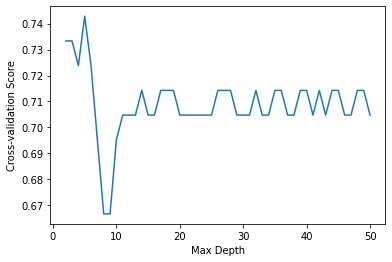

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV, cross_val_score
max_depths = range(2,51)
param_grid = {'max_depth' : max_depths}
gs_inst = GridSearchCV(dtc, param_grid=param_grid,cv=5)
gs_inst.fit(X_train, y_train)
plt.plot(max_depths,gs_inst.cv_results_['mean_test_score'])
plt.xlabel('Max Depth')
plt.ylabel("Cross-validation Score")